In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("loan_approval_dataset.csv",skipinitialspace=True)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [5]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [6]:
#eksik veri olmadıgı için veri doldurma aşaması atlandı.
#Encoding aşaması

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [8]:
categorical_columns= ["education","self_employed","loan_status"]
le= LabelEncoder()
for col in categorical_columns:
    df[col]=le.fit_transform(df[col])

In [9]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [10]:
X= df.drop(columns=["loan_status"])
y=df["loan_status"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)
X_train

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3404,3405,4,1,0,2800000,8300000,14,381,3200000,1100000,9100000,1500000
781,782,3,1,1,9900000,20400000,4,865,26300000,3600000,36500000,12800000
3002,3003,4,0,1,3500000,10700000,8,883,200000,2300000,8400000,2000000
4047,4048,3,1,0,6400000,23000000,8,520,12100000,11400000,16000000,3800000
3391,3392,2,0,1,3300000,6700000,8,845,1300000,4600000,12300000,3200000
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3445,0,0,1,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,467,5,1,1,500000,1800000,18,411,1000000,500000,1300000,200000
3092,3093,4,1,1,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,3773,2,1,1,7000000,21400000,12,541,3700000,1300000,19800000,9600000


In [13]:
scaler = StandardScaler()

In [14]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[ 1.01651351,  0.93571344,  1.00739009, ..., -0.8829542 ,
        -0.66673165, -1.0707675 ],
       [-1.12222341,  0.3421016 ,  1.00739009, ..., -0.31157915,
         2.32080181,  2.41121979],
       [ 0.68873149,  0.93571344, -0.99266412, ..., -0.60869418,
        -0.7430555 , -0.91669727],
       ...,
       [ 0.76211552,  0.93571344,  1.00739009, ...,  1.28827099,
         1.47033608,  0.13098032],
       [ 1.31657267, -0.25151024,  1.00739009, ..., -0.8372442 ,
         0.49993288,  1.42517029],
       [-1.05780854,  0.93571344, -0.99266412, ..., -0.28872415,
         1.03419981, -0.11553205]])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [20]:
confusion_matrix(y_test,y_pred)

array([[723,  87],
       [ 67, 404]])

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       810
           1       0.82      0.86      0.84       471

    accuracy                           0.88      1281
   macro avg       0.87      0.88      0.87      1281
weighted avg       0.88      0.88      0.88      1281



In [43]:
accuracy_score(y_test,y_pred)

0.8797814207650273

In [45]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid={"n_neighbors": list(range(1,21))}

In [61]:
grid= GridSearchCV(KNeighborsClassifier(),param_grid,scoring="accuracy",cv=5)

In [65]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [69]:
grid.best_params_
#en iyi çalışan 

{'n_neighbors': 17}

In [71]:
knn2 = KNeighborsClassifier(n_neighbors=17)
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [75]:
y_pred2 =knn2.predict(X_test)

In [77]:
confusion_matrix(y_test,y_pred2)

array([[739,  71],
       [ 70, 401]])

In [79]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       810
           1       0.85      0.85      0.85       471

    accuracy                           0.89      1281
   macro avg       0.88      0.88      0.88      1281
weighted avg       0.89      0.89      0.89      1281



In [81]:
accuracy_score(y_test,y_pred2)

0.8899297423887588

In [83]:
#Pipeline Yapısı 
#KNN WEİGHT
#knn Metric
#PCA yAPISI VE UYGULAMASI(Principal Component Analysis)

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:

pipe = Pipeline([
    ('scaler', StandardScaler()),                 # Ölçekleme
    ('pca', PCA(n_components=5)),                 # Boyut indirgeme
    ('knn', KNeighborsClassifier())               # KNN sınıflandırıcı
])

In [ ]:

param_grid = {
    'pca__n_components': [2, 3, 5, 7],
    'knn__n_neighbors': list(range(1, 21)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk skoru:", grid_search.best_score_)


En iyi parametreler: {'knn__metric': 'euclidean', 'knn__n_neighbors': 19, 'knn__weights': 'distance', 'pca__n_components': 7}
En iyi doğruluk skoru: 0.9136591541878847


In [ ]:

best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
print("Test seti doğruluk skoru:", accuracy_score(y_test, y_pred_final))

[[736  74]
 [ 51 420]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       810
           1       0.85      0.89      0.87       471

    accuracy                           0.90      1281
   macro avg       0.89      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281

Test seti doğruluk skoru: 0.9024199843871975


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

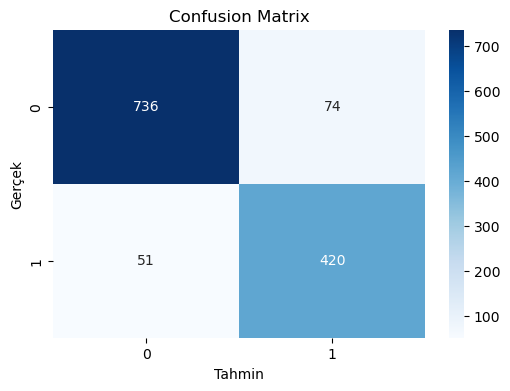

In [95]:
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()

In [99]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, RocCurveDisplay

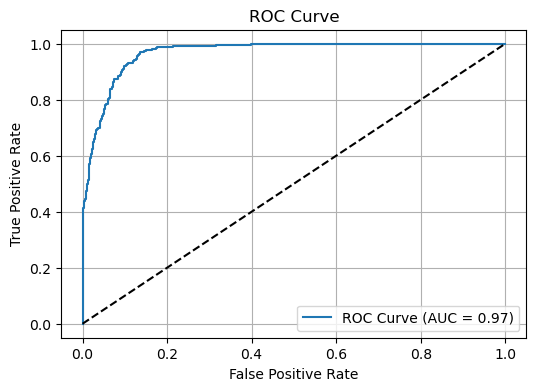

In [ ]:
if len(set(y_test)) == 2:
    y_pred_proba = best_model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("ROC Curve sadece binary sınıflandırmalarda uygulanabilir.")



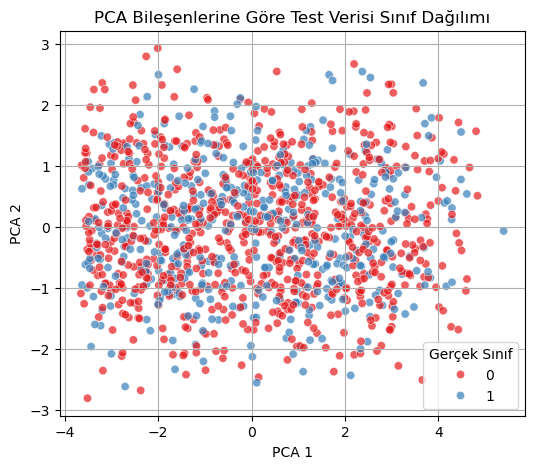

In [ ]:

from sklearn.decomposition import PCA
pca_vis = PCA(n_components=2)
X_pca = pca_vis.fit_transform(X_test)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_test, palette='Set1', alpha=0.7)
plt.title("PCA Bileşenlerine Göre Test Verisi Sınıf Dağılımı")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Gerçek Sınıf")
plt.grid(True)
plt.show()
